<a href="https://colab.research.google.com/github/PSLeon24/LearnAI/blob/main/%08mnist_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>숫자 인식 인공지능 만들기</h1>

2023년 5월 2일(화요일) 고영민

**1. 딥러닝 모델 개발을 위한 라이브러리 불러오기**

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**2. 데이터셋 불러오기**

인공지능 모델을 만들기 위해서 훈련 데이터(train data)와 검증 데이터(test data)가 필요

학생이 시험을 보기 위해 문제집을 풀어서 공부한 후 시험을 침 → 이와 같이 훈련 데이터로 학습한 후 학습에 사용하지 않은 데이터인 검증 데이터로 인공지능의 성능을 평가해야 함


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # 데이터 불러오기
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape', x_test.shape)
print('x_test shape', y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
x_test shape (10000,)


· (x_train, y_train), (x_test, y_test) = mnist.load_data()
mnist 데이터셋에는 load_data()라는 함수가 포함되어 있음

load_data(): mnist 데이터셋에서 데이터를 불러오라는 명령어

mnist 데이터는 훈련 데이터(x_train, y_train)와 검증 데이터(x_test, y_test)의 네 부분으로 나뉘어 있음

훈련 데이터는 각 손글씨 그림(x_train)과 그 그림이 어떤 숫자를 의미하는지(y_train)가 있으며 검증 데이터도 마찬가지임



· print("x_train shape", x_train.shape)
x_train 데이터의 형태를 출력하는 명령어

x_train.shape에서 shape를 사용하면 데이터 형태를 볼 수 있음

코드 실행 결과: x_train shape (60000, 28, 28)

x_train 데이터에는 총 60,000개의 데이터가 있고, 각 데이터에는 가로 28 x 세로 28의 데이터가 있으므로 x_train 데이터의 모습은 60000, 28, 28임

· print("y_train shape", y_train.shape)
y_train 데이터의 형태를 출력하는 명령어

y_train 데이터는 x_train 데이터의 정답

코드 실행 결과: y_train shape (60000,) # x_train 데이터의 개수와 동일

y_train의 경우 1차원 배열인데, y_train 데이터는 x_train의 몇 번째 데이터의 값이 무엇인지를 나타내고 있기 때문임



· print("x_test shape", x_test.shape)
x_test 데이터의 형태를 출력하는 명령어

코드 실행 결과: x_test shape (10000, 28, 28)

x_train 데이터와 비교했을 때 데이터의 총 개수가 다름



· print("y_test shape", y_test.shape)
y_test 데이터의 형태를 출력하는 명령어

코드 실행 결과: y_test shape (10000,)

x_test shape와 마찬가지로 y_train과 비교했을 때 데이터의 총 개수가 다름

**3. mnist 데이터셋에서 X의 형태 변형**

인공지능 모델을 학습시키기 위해 28x28 형태의 데이터의 형태를 바꿀 필요가 있음

why? → 인공 신경망의 입력층에 넣을 때는 한 줄로 만들어 넣어야 하기 때문

반드시 한 줄로 넣어야 하나? → 항상 입력 데이터를 한 줄로 만들 필요는 X, 모델을 설계하는 방식에 따라 바뀜



먼저, 28x28의 데이터를 1x784 형태처럼 즉 일차원 배열의 형태로 만들고자 함(numpy의 reshape() 함수 사용)

In [5]:
X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)

# 정규화 처리 → 데이터의 특성을 더 잘드러나도록 하기 위해 해줌
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(f'X Training matrix shape is {X_train.shape}')
print(f'X Testing matrix shape is {X_test.shape}')

X Training matrix shape is (60000, 784)
X Testing matrix shape is (10000, 784)


· X_train = x_train.reshape(60000, 784) &X_test = x_test.reshape(10000, 784)
28x28 형태인 x_train 데이터와 x_test 데이터를 1x784로 바꿈



· x_train = X_train.astype('float32') & X_test = x_test.astype('float32')
정규화하기 위해 데이터를 0~1 사이의 값으로 바꿔야 함. 따라서 실수형으로 자료형을 변경



·X_train /= 255 & X_test /= 255
mnist 데이터는 검은색은 0, 흰색은 255, 회색은 1~254 사이의 값으로 이루어져 있음

이를 정규화하기 위해 데이터를 0~1 사이의 값으로 바꾸는 방법은 바로 255로 나누면 됨

**4. mnist 데이터셋에서 Y의 형태 변형**

y_train 데이터와 y_test 데이터의 형태를 인공지능이 분류를 잘 할 수 있도록 변형이 필요

인공지능은 이미지가 가진 숫자의 특성을 알 필요가 없음(ex: 숫자 간 대소관계)

따라서 이미지의 정답(label)을 인공지능에게 0, 1, 2, 3, 4, 5, 6, 7, 8, 9와 같이 알려주는 것이 아니라 0은 10개의 숫자 중 첫 번째, 4는 10개의 숫자 중 5번째 숫자로 변환해주는 것이 필요(수치형 데이터 ⇒ 범주형 데이터로 변환)

따라서, 정답 레이블을 순서로 나타내도록 데이터의 형태를 바꾸기 위해 원-핫 인코딩(one-hot incoding) 사용

In [6]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
print(f'Y Training matrix shape is {Y_train.shape}')
print(f'Y Test matrix shape is {Y_test.shape}')

Y Training matrix shape is (60000, 10)
Y Test matrix shape is (10000, 10)


· Y_train = to_categorical(y_train, 10) &Y_test = to_categorical(y_test, 10)

Y_train 데이터와 Y-test 데이터를 원-핫 인코딩함

to_categorical() 함수는 수치형 데이터를 범주형 데이터로 만들어 주는 함수

이 함수를 사용하기 위해서는 변경 전 데이터와 원-핫 인코딩할 숫자, 즉 몇 개로 구분하고자 하는지가 필요(우리는 10개가 필요하므로 10으로 설정)

만약 숫자가 3일 경우 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]과 같이 바뀜

In [7]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trai

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 7s 13ms/step - loss: 0.2276 - accuracy: 0.9340
Epoch 2/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0820 - accuracy: 0.9755
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0532 - accuracy: 0.9832
Epoch 4/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0353 - accuracy: 0.9884
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0273 - accuracy: 0.9914
Epoch 6/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0232 - accuracy: 0.9923
Epoch 7/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0183 - accuracy: 0.9940
Epoch 8/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0153 - accuracy: 0.9948
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0115 - accuracy: 0.9960
Epoch 10/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0125 - accura

In [9]:
score = model.evaluate(X_test, Y_test)
print(f'Test score is {score[0]}')
print(f'Test accuracy is {score[1]}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0764 - accuracy: 0.9808
Test score is 0.07637156546115875
Test accuracy is 0.9807999730110168


In [13]:
predicted_classes = np.argmax(model.predict(X_test), axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 [==============================] - 2s 5ms/step


<ipython-input-11-7b9ec4ef4916>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i+1)


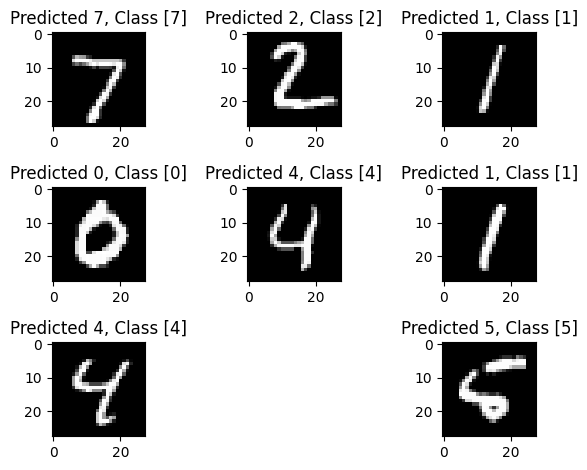

In [11]:
plt.figure()
for i in range(9):
  plt.subplot(3, 3, i+1)
  correct = correct_indices[i]
  plt.imshow(X_test[correct].reshape(28, 28), cmap='gray')
  plt.title(f'Predicted {predicted_classes[correct]}, Class {[y_test[correct]]}')
  plt.tight_layout()

<ipython-input-14-e4e54788a064>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i+1)


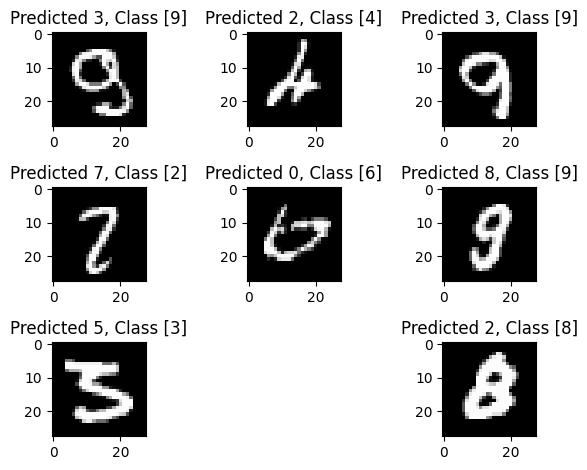

In [14]:
plt.figure()
for i in range(9):
  plt.subplot(3, 3, i+1)
  incorrect = incorrect_indices[i]
  plt.imshow(X_test[incorrect].reshape(28, 28), cmap='gray')
  plt.title(f'Predicted {predicted_classes[incorrect]}, Class {[y_test[incorrect]]}')
  plt.tight_layout()

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=50, verbose=1)

Epoch 1/50
469/469 [==============================] - 8s 15ms/step - loss: 0.0144 - accuracy: 0.9952
Epoch 2/50
469/469 [==============================] - 5s 12ms/step - loss: 0.0125 - accuracy: 0.9959
Epoch 3/50
469/469 [==============================] - 6s 13ms/step - loss: 0.0077 - accuracy: 0.9972
Epoch 4/50
469/469 [==============================] - 6s 13ms/step - loss: 0.0082 - accuracy: 0.9974
Epoch 5/50
469/469 [==============================] - 6s 12ms/step - loss: 0.0105 - accuracy: 0.9967
Epoch 6/50
469/469 [==============================] - 7s 14ms/step - loss: 0.0067 - accuracy: 0.9979
Epoch 7/50
469/469 [==============================] - 6s 12ms/step - loss: 0.0095 - accuracy: 0.9969
Epoch 8/50
469/469 [==============================] - 7s 14ms/step - loss: 0.0085 - accuracy: 0.9970
Epoch 9/50
469/469 [==============================] - 6s 12ms/step - loss: 0.0087 - accuracy: 0.9973
Epoch 10/50
469/469 [==============================] - 7s 15ms/step - loss: 0.0030 - accura